In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pandas_datareader.data as web

In [4]:
import datetime

In [73]:
start = datetime.datetime(2009, 12, 29)

In [74]:
end = datetime.datetime(2021, 3, 12 )

In [75]:
code_name = '^KS11'

In [76]:
#code = web.DataReader(code_name, "yahoo", start, end)  # 아래 API를 이용하는 방법

In [77]:
code = web.get_data_yahoo(code_name, start, end)    # API를 활용

In [78]:
code

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-29,1683.050049,1662.069946,1674.959961,1672.479980,318000.0,1672.479980
2009-12-30,1682.770020,1661.109985,1670.189941,1682.770020,326500.0,1682.770020
2010-01-04,1696.140015,1681.709961,1681.709961,1696.140015,296500.0,1696.140015
2010-01-05,1702.390015,1686.449951,1701.619995,1690.619995,408900.0,1690.619995
2010-01-06,1706.890015,1696.099976,1697.880005,1705.319946,426000.0,1705.319946
...,...,...,...,...,...,...
2021-03-08,3055.649902,2992.639893,3031.989990,2996.110107,1928300.0,2996.110107
2021-03-09,3000.489990,2929.360107,2989.959961,2976.120117,1534200.0,2976.120117
2021-03-10,3013.949951,2951.530029,2980.760010,2958.120117,905600.0,2958.120117


In [79]:
import matplotlib.pyplot as plt

In [80]:
plt.figure(figsize = (8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

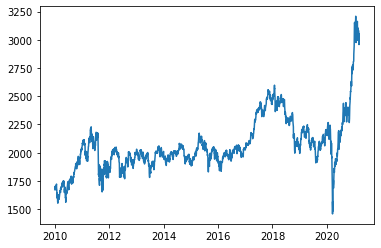

In [81]:
plt.plot(code['Close'])

In [82]:
data = code.filter(['Close']).values

In [83]:
data

array([[1672.47998047],
       [1682.77001953],
       [1696.14001465],
       ...,
       [2958.12011719],
       [3013.69995117],
       [3054.38989258]])

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scalar = MinMaxScaler(feature_range=(0,1))

In [86]:
scaled_data = scalar.fit_transform(data)

In [87]:
scaled_data

array([[0.12267106],
       [0.12854655],
       [0.13618066],
       ...,
       [0.85675629],
       [0.88849171],
       [0.91172518]])

In [88]:
len(scaled_data)

2756

In [89]:
import math

In [90]:
training_data_len = math.ceil(len(scaled_data)*0.8)

In [91]:
training_data_len  # 80%에 해당하는 2190개의 데이터 갯수 출력

2205

In [92]:
# set train data

In [93]:
train_data = scaled_data[0:training_data_len]

In [94]:
train_data = np.array(train_data)

In [95]:
np.shape(train_data)

(2205, 1)

In [96]:
x_train = []

In [97]:
y_train = []

In [98]:
PAST_SET = 60

In [99]:
for i in range(PAST_SET, len(train_data), 5):
    x_train.append(train_data[i-PAST_SET:i, 0])
    y_train.append(train_data[i:i+5, 0])

In [100]:
np.shape(x_train)    

(429, 60)

In [101]:
np.shape(y_train)    # 왜 (426,5)으로 저장 : 총 데이터 갯수가 출력의 배수가 되도록 할 것 (210314)

(429, 5)

In [102]:
x_train

[array([0.12267106, 0.12854655, 0.13618066, 0.1330288 , 0.14142229,
        0.12893479, 0.13567819, 0.13502726, 0.13760813, 0.12206014,
        0.13025952, 0.13941247, 0.14511092, 0.14422015, 0.14659548,
        0.15095212, 0.12944869, 0.12136919, 0.10260653, 0.09583462,
        0.10551291, 0.08267339, 0.08496299, 0.07889345, 0.08986211,
        0.09066151, 0.06251177, 0.05432953, 0.06443599, 0.06422473,
        0.08003543, 0.07766581, 0.08188542, 0.09694809, 0.09338506,
        0.07780284, 0.09675962, 0.09778743, 0.08861161, 0.07415422,
        0.07819108, 0.0899192 , 0.0940988 , 0.09167781, 0.10102489,
        0.11556801, 0.11601904, 0.11682415, 0.1136152 , 0.11710965,
        0.10954977, 0.108699  , 0.12859792, 0.12420706, 0.13045364,
        0.12277959, 0.12800407, 0.12754161, 0.1317555 , 0.1370828 ]),
 array([0.12893479, 0.13567819, 0.13502726, 0.13760813, 0.12206014,
        0.13025952, 0.13941247, 0.14511092, 0.14422015, 0.14659548,
        0.15095212, 0.12944869, 0.12136919, 0.

In [103]:
y_train[428]  # 갯수가 5개로 나누어 떨어지는 지 가장 마지막 데이터 확인할 것

array([0.34890224, 0.35293916, 0.34039457, 0.33992632, 0.35682763])

In [104]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [105]:
np.shape(x_train)

(429, 60)

In [106]:
np.shape(y_train)

(429, 5)

In [107]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [108]:
x_train.shape[0]

429

In [109]:
x_train.shape[1]

60

In [110]:
np.shape(x_train)

(429, 60, 1)

In [111]:
x_train

array([[[0.12267106],
        [0.12854655],
        [0.13618066],
        ...,
        [0.12754161],
        [0.1317555 ],
        [0.1370828 ]],

       [[0.12893479],
        [0.13567819],
        [0.13502726],
        ...,
        [0.13430209],
        [0.14933054],
        [0.15179717]],

       [[0.13025952],
        [0.13941247],
        [0.14511092],
        ...,
        [0.15357294],
        [0.15767266],
        [0.15235673]],

       ...,

       [[0.46574932],
        [0.47104239],
        [0.4771005 ],
        ...,
        [0.3670997 ],
        [0.35683334],
        [0.35339027]],

       [[0.48613357],
        [0.48517435],
        [0.49404167],
        ...,
        [0.35708454],
        [0.36644869],
        [0.37147341]],

       [[0.47627831],
        [0.47390305],
        [0.47045997],
        ...,
        [0.38501152],
        [0.37497364],
        [0.36752794]]])

In [112]:
from tensorflow.keras.models import Sequential

In [113]:
from tensorflow.keras.layers import Dense, LSTM

In [114]:
from tensorflow import keras

In [115]:
model = Sequential()

In [116]:
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

In [117]:
model.add(LSTM(50, return_sequences=False))

In [118]:
model.add(Dense(25))

In [119]:
model.add(Dense(5))

In [120]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [121]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 130       
Total params: 32,005
Trainable params: 32,005
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.fit(x_train, y_train, batch_size=20, epochs=200)

Epoch 1/200
22/22 [==============================] - 1s 38ms/step - loss: 3.5120e-04
Epoch 2/200
22/22 [==============================] - 1s 33ms/step - loss: 3.4039e-04
Epoch 3/200
22/22 [==============================] - 1s 32ms/step - loss: 3.3463e-04
Epoch 4/200
22/22 [==============================] - 1s 33ms/step - loss: 3.5852e-04
Epoch 5/200
22/22 [==============================] - 1s 33ms/step - loss: 3.3709e-04
Epoch 6/200
22/22 [==============================] - 1s 33ms/step - loss: 3.5074e-04
Epoch 7/200
22/22 [==============================] - 1s 34ms/step - loss: 3.6896e-04
Epoch 8/200
22/22 [==============================] - 1s 33ms/step - loss: 3.4325e-04
Epoch 9/200
22/22 [==============================] - 1s 33ms/step - loss: 3.8452e-04
Epoch 10/200
22/22 [==============================] - 1s 35ms/step - loss: 4.7130e-04
Epoch 11/200
22/22 [==============================] - 1s 35ms/step - loss: 3.8618e-04
Epoch 12/200
22/22 [==============================] - 1s 33ms/s

22/22 [==============================] - 1s 36ms/step - loss: 3.4144e-04
Epoch 189/200
22/22 [==============================] - 1s 36ms/step - loss: 3.3524e-04
Epoch 190/200
22/22 [==============================] - 1s 37ms/step - loss: 3.3678e-04
Epoch 191/200
22/22 [==============================] - 1s 36ms/step - loss: 3.3880e-04
Epoch 192/200
22/22 [==============================] - 1s 38ms/step - loss: 3.4440e-04
Epoch 193/200
22/22 [==============================] - 1s 37ms/step - loss: 3.5714e-04
Epoch 194/200
22/22 [==============================] - 1s 36ms/step - loss: 3.3629e-04
Epoch 195/200
22/22 [==============================] - 1s 37ms/step - loss: 3.3211e-04
Epoch 196/200
22/22 [==============================] - 1s 37ms/step - loss: 3.5381e-04
Epoch 197/200
22/22 [==============================] - 1s 36ms/step - loss: 3.6761e-04
Epoch 198/200
22/22 [==============================] - 1s 37ms/step - loss: 3.4082e-04
Epoch 199/200
22/22 [==============================] - 1s

In [124]:
# Training 시간 소요

In [125]:
test_data = scaled_data[training_data_len - PAST_SET:,:]

In [126]:
len(test_data)    # 547개 데이터 (20%) + 60개 (예측 시작 점 전 참고 데이터 갯수 60개)

611

In [127]:
x_test = []

In [128]:
y_test = data[training_data_len:,:]

In [129]:
y_test

array([[2095.55004883],
       [2069.37988281],
       [2071.09008789],
       [2062.11010742],
       [2078.84008789],
       [2060.12011719],
       [2061.48999023],
       [2055.01000977],
       [2028.01000977],
       [2028.43994141],
       [2041.04003906],
       [2010.        ],
       [1993.69995117],
       [2010.25      ],
       [2037.09997559],
       [2025.27001953],
       [2064.70996094],
       [2063.2800293 ],
       [2075.57006836],
       [2064.52001953],
       [2097.17993164],
       [2106.10009766],
       [2107.06005859],
       [2124.2800293 ],
       [2124.61010742],
       [2117.77001953],
       [2127.7800293 ],
       [2145.0300293 ],
       [2177.72998047],
       [2177.30004883],
       [2183.36010742],
       [2206.19995117],
       [2204.85009766],
       [2203.45996094],
       [2203.41992188],
       [2177.05004883],
       [2180.72998047],
       [2190.4699707 ],
       [2201.47998047],
       [2225.85009766],
       [2196.09008789],
       [2210.889

In [130]:
for i in range(PAST_SET, len(test_data), 5):
    x_test.append(test_data[i-PAST_SET:i, 0])

In [131]:
x_test = np.array(x_test)

In [132]:
np.shape(x_test)      # LSTM의 Input 구조를 확인

(111, 60)

In [133]:
x_test

array([[0.47122501, 0.47311501, 0.49139806, ..., 0.34039457, 0.33992632,
        0.35682763],
       [0.48580807, 0.49436717, 0.50334309, ..., 0.35027269, 0.34514523,
        0.35469785],
       [0.50317748, 0.48644193, 0.46641162, ..., 0.34109116, 0.32567448,
        0.32591997],
       ...,
       [0.66706821, 0.67137348, 0.64732925, ..., 0.9262055 , 0.92068981,
        0.87780283],
       [0.70721442, 0.72733032, 0.73531844, ..., 0.90571852, 0.9280555 ,
        0.90550147],
       [0.73590086, 0.74937623, 0.7448882 , ..., 0.86703407, 0.85675629,
        0.88849171]])

In [134]:
np.shape(x_test)

(111, 60)

In [135]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [136]:
predictions = model.predict(x_test)

In [137]:
predictions

array([[0.3479749 , 0.35249752, 0.36012125, 0.35873497, 0.35628882],
       [0.34444994, 0.34826595, 0.35556403, 0.35559323, 0.35467565],
       [0.3151075 , 0.31905046, 0.32635096, 0.3279937 , 0.32763892],
       [0.32322577, 0.32749438, 0.33564892, 0.33390713, 0.3312742 ],
       [0.33600476, 0.3389951 , 0.3456944 , 0.3474279 , 0.34897283],
       [0.37061632, 0.3738173 , 0.38019344, 0.38117066, 0.38273796],
       [0.40146714, 0.40523124, 0.4110993 , 0.4112821 , 0.41232094],
       [0.41333562, 0.41707414, 0.42270377, 0.4241708 , 0.4257213 ],
       [0.42977598, 0.4341507 , 0.4405483 , 0.43922612, 0.43775508],
       [0.43055317, 0.43429616, 0.44052202, 0.44084597, 0.44048074],
       [0.40815952, 0.41141748, 0.41729066, 0.42088076, 0.4224061 ],
       [0.37614554, 0.3799191 , 0.38652828, 0.38928938, 0.3888807 ],
       [0.40118986, 0.40454644, 0.4119283 , 0.4111508 , 0.40906253],
       [0.40679985, 0.40949747, 0.41649058, 0.417411  , 0.417414  ],
       [0.38003364, 0.38364068, 0.

In [138]:
predictions = scalar.inverse_transform(predictions)

In [139]:
np.shape(predictions)

(111, 5)

In [140]:
predictions

array([[2067.0657, 2074.9866, 2088.3384, 2085.9104, 2081.6265],
       [2060.8923, 2067.5757, 2080.3572, 2080.4082, 2078.801 ],
       [2009.5035, 2016.409 , 2029.1948, 2032.0718, 2031.4504],
       [2023.7216, 2031.1973, 2045.4789, 2042.4282, 2037.8171],
       [2046.102 , 2051.339 , 2063.0718, 2066.108 , 2068.8137],
       [2106.7188, 2112.325 , 2123.4917, 2125.2034, 2127.948 ],
       [2160.7495, 2167.3416, 2177.6187, 2177.939 , 2179.7583],
       [2181.5354, 2188.0828, 2197.9424, 2200.5115, 2203.2268],
       [2210.3284, 2217.9897, 2229.194 , 2226.8787, 2224.3022],
       [2211.6892, 2218.2446, 2229.1482, 2229.7156, 2229.076 ],
       [2172.4702, 2178.176 , 2188.462 , 2194.7495, 2197.421 ],
       [2116.4026, 2123.0115, 2134.5864, 2139.4219, 2138.7063],
       [2160.264 , 2166.1423, 2179.0706, 2177.709 , 2174.0518],
       [2170.0889, 2174.8135, 2187.0608, 2188.6729, 2188.678 ],
       [2123.212 , 2129.5293, 2142.356 , 2143.1204, 2140.7747],
       [2189.5293, 2194.5244, 2205.408 ,

In [141]:
predictions.shape = (111*5, 1)

In [142]:
predictions

array([[2067.0657],
       [2074.9866],
       [2088.3384],
       [2085.9104],
       [2081.6265],
       [2060.8923],
       [2067.5757],
       [2080.3572],
       [2080.4082],
       [2078.801 ],
       [2009.5035],
       [2016.409 ],
       [2029.1948],
       [2032.0718],
       [2031.4504],
       [2023.7216],
       [2031.1973],
       [2045.4789],
       [2042.4282],
       [2037.8171],
       [2046.102 ],
       [2051.339 ],
       [2063.0718],
       [2066.108 ],
       [2068.8137],
       [2106.7188],
       [2112.325 ],
       [2123.4917],
       [2125.2034],
       [2127.948 ],
       [2160.7495],
       [2167.3416],
       [2177.6187],
       [2177.939 ],
       [2179.7583],
       [2181.5354],
       [2188.0828],
       [2197.9424],
       [2200.5115],
       [2203.2268],
       [2210.3284],
       [2217.9897],
       [2229.194 ],
       [2226.8787],
       [2224.3022],
       [2211.6892],
       [2218.2446],
       [2229.1482],
       [2229.7156],
       [2229.076 ],


In [157]:
len(predictions)

555

In [143]:
#rmse = np.sqrt(np.mean(predictions - y_test)**2)

In [144]:
#rmse

In [145]:
data = code.filter(['Close'])

In [146]:
data

,Close
Date,
2009-12-29,1672.479980
2009-12-30,1682.770020
2010-01-04,1696.140015
2010-01-05,1690.619995
2010-01-06,1705.319946
...,...
2021-03-08,2996.110107
2021-03-09,2976.120117
2021-03-10,2958.120117


In [147]:
train = data[:training_data_len]

In [148]:
train

,Close
Date,
2009-12-29,1672.479980
2009-12-30,1682.770020
2010-01-04,1696.140015
2010-01-05,1690.619995
2010-01-06,1705.319946
...,...
2018-12-06,2068.689941
2018-12-07,2075.760010
2018-12-10,2053.790039


In [729]:
valid = data[training_data_len:len(data)]  # 6개씩 예측하므로 끝자리가 딱 맞아 떨어지지 않는 문제점 / 임의로 13개 데이터 제외??

In [722]:
#type(valid)

pandas.core.frame.DataFrame

In [753]:
start = datetime.datetime(2010, 1, 1)

In [149]:
end = datetime.datetime(2021, 3, 12)

In [150]:
code = web.get_data_yahoo(code_name, start, end)    # API를 활용

In [151]:
code

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-29,1683.050049,1662.069946,1674.959961,1672.479980,318000.0,1672.479980
2009-12-30,1682.770020,1661.109985,1670.189941,1682.770020,326500.0,1682.770020
2010-01-04,1696.140015,1681.709961,1681.709961,1696.140015,296500.0,1696.140015
2010-01-05,1702.390015,1686.449951,1701.619995,1690.619995,408900.0,1690.619995
2010-01-06,1706.890015,1696.099976,1697.880005,1705.319946,426000.0,1705.319946
...,...,...,...,...,...,...
2021-03-08,3055.649902,2992.639893,3031.989990,2996.110107,1928300.0,2996.110107
2021-03-09,3000.489990,2929.360107,2989.959961,2976.120117,1534200.0,2976.120117
2021-03-10,3013.949951,2951.530029,2980.760010,2958.120117,905600.0,2958.120117


In [152]:
data = code.filter(['Close'])

In [153]:
len(data)

2756

In [154]:
valid = data[training_data_len:len(data)]

In [155]:
valid

,Close
Date,
2018-12-13,2095.550049
2018-12-14,2069.379883
2018-12-17,2071.090088
2018-12-18,2062.110107
2018-12-19,2078.840088
...,...
2021-03-08,2996.110107
2021-03-09,2976.120117
2021-03-10,2958.120117


In [812]:
len(predictions)

550

In [156]:
len(valid)

551

In [813]:
#predictions = pd.DataFrame(predictions, columns = ['Predictions'])

In [814]:
predictions

array([[2058.5117],
       [2052.668 ],
       [2056.0842],
       [2047.5599],
       [2043.1272],
       [2094.7034],
       [2089.8518],
       [2092.6226],
       [2083.9165],
       [2076.826 ],
       [2072.1104],
       [2066.163 ],
       [2069.7004],
       [2061.4976],
       [2057.177 ],
       [2071.44  ],
       [2066.7131],
       [2069.5776],
       [2061.8262],
       [2054.518 ],
       [2058.187 ],
       [2053.5027],
       [2056.6384],
       [2048.7056],
       [2042.2566],
       [2016.1342],
       [2011.0327],
       [2014.2716],
       [2006.7649],
       [2002.5192],
       [2053.1343],
       [2049.9158],
       [2052.9673],
       [2044.9713],
       [2033.8627],
       [2099.3792],
       [2095.9368],
       [2098.811 ],
       [2089.2837],
       [2078.9573],
       [2122.0613],
       [2116.9521],
       [2120.0898],
       [2110.4958],
       [2102.8535],
       [2196.6074],
       [2191.7812],
       [2194.5476],
       [2185.114 ],
       [2173.6328],


In [815]:
len(valid)

550

In [819]:
valid.loc[:,'Predictions'] = np.array(predictions)

In [820]:
valid

,Close,Predictions
Date,,
2018-11-26,2083.020020,2058.511719
2018-11-27,2099.419922,2052.667969
2018-11-28,2108.219971,2056.084229
2018-11-29,2114.100098,2047.559937
2018-11-30,2096.860107,2043.127197
...,...,...
2021-02-15,3147.000000,3114.983398
2021-02-16,3163.250000,3089.388672
2021-02-17,3133.729980,3095.787354


In [821]:
plt.figure(figsize = (15,4))

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

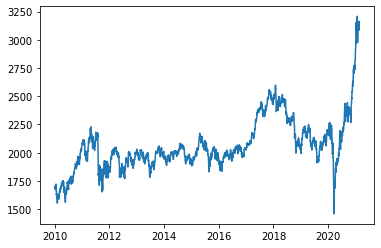

In [822]:
plt.plot(data['Close'])

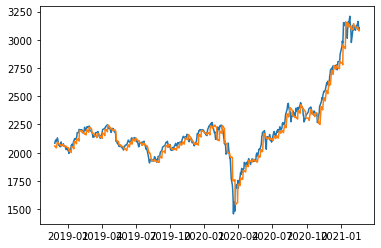

In [832]:
plt.plot(valid[['Close', 'Predictions']])    # 60개의 데이터를 입력받아 5개의 데이터를 한꺼번에 계산한 결과

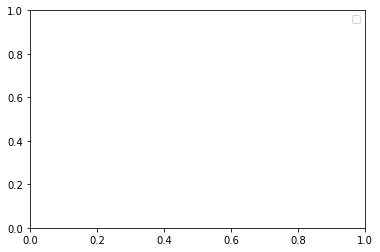

In [286]:
plt.legend(['Train', 'Val', 'Predictions'])

In [287]:
plt.show()